In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from Preprocess import Process
from TestData import ShowData
import tensorflow as tf
import pathlib
import random
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import datetime
from keras import utils as np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
path="data/flower_photos"
checkpoint_path = "training_3/cp.ckpt"
height=224
width=224
base_learning_rate=0.0001

In [11]:
process= Process(path,height,width)

In [ ]:
images,labels,indexToLabel=process.ImageProcess()

In [5]:
train_images= images[:3000]
train_label= labels[:3000]
test_images= images[3000:3300]
test_lebel=labels[3000:3300]
val_images= images[3300:]
val_label=labels[3300:]

In [6]:
print("train_shape: {}, Train_labels: {},test_image_shape: {}, test_labels: {},validation_image_shape: {}, validation_labels: {}".format(train_images.shape, 
                                                                                       train_label.shape,
                                                                                 test_images.shape, test_lebel.shape,val_images.shape,val_label.shape ))

train_shape: (3000, 224, 224, 3), Train_labels: (3000,),test_image_shape: (300, 224, 224, 3), test_labels: (300,),validation_image_shape: (370, 224, 224, 3), validation_labels: (370,)


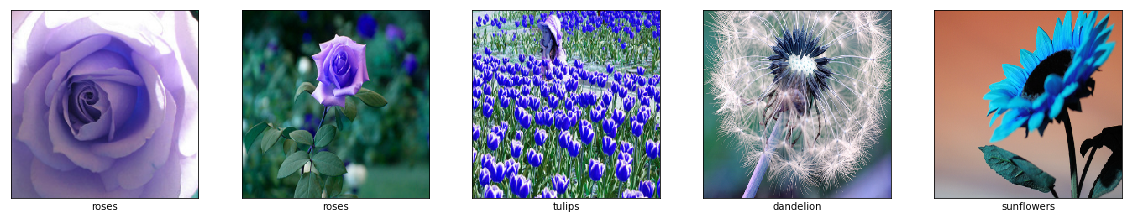

In [7]:
showData=ShowData(train_images,train_label,test_images,test_lebel,indexToLabel)
showData.checkTrainData()

In [5]:
VGG = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False)
VGG.trainable=False

model = tf.keras.Sequential([
  VGG,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 14,780,997
Trainable params: 66,309
Non-trainable params: 14,714,688
____

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [13]:
batch_size=8
epochs=15

In [14]:
datagen.fit(train_images)
history=model.fit_generator(datagen.flow(train_images, train_label, batch_size=batch_size),
                    steps_per_epoch=len(train_images) / batch_size, epochs=epochs,
                    validation_data=(val_images, val_label),callbacks = [cp_callback])

Epoch 1/15
370/370 [==============================] - 101s 272ms/sample - loss: 1.2791 - acc: 0.5270

Epoch 00001: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
375/375 [==============================] - 951s 3s/step - loss: 1.3875 - acc: 0.4500 - val_loss: 1.2791 - val_acc: 0.5270
Epoch 2/15
370/370 [==============================] - 100s 271ms/sample - loss: 1.1344 - acc: 0.5432

Epoch 00002: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
375/375 [==============================] - 928s 2s/step - loss: 1.0179 - acc: 0.6790 - val_loss: 1.1363 - val_acc: 0.5432
Epoch 3/15
370/370 [==============================] - 103s 279ms/sample - loss: 1.0227 - acc: 0.5811

Epoch 00003: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
375/375

375/375 [==============================] - 919s 2s/step - loss: 0.4769 - acc: 0.8350 - val_loss: 0.7214 - val_acc: 0.7270
Epoch 13/15
370/370 [==============================] - 99s 269ms/sample - loss: 0.7246 - acc: 0.7189

Epoch 00013: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
375/375 [==============================] - 917s 2s/step - loss: 0.4700 - acc: 0.8347 - val_loss: 0.7278 - val_acc: 0.7189
Epoch 14/15
370/370 [==============================] - 100s 269ms/sample - loss: 0.6968 - acc: 0.7432

Epoch 00014: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
375/375 [==============================] - 918s 2s/step - loss: 0.4509 - acc: 0.8370 - val_loss: 0.6991 - val_acc: 0.7432
Epoch 15/15
370/370 [==============================] - 100s 269ms/sample - loss: 0.6760 - acc: 0.7432

Epoch 00015: saving model to training_3/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
375/375 [=====

In [15]:
loss,accuracy=model.evaluate(test_images, test_lebel)
print("Accuracy: {}, Loss: {}".format((accuracy*100),loss ))
predictions = model.predict(test_images)

300/300 [==============================] - 170s 565ms/sample - loss: 0.7516 - acc: 0.7300
Accuracy: 73.00000190734863, Loss: 0.7516436378161112


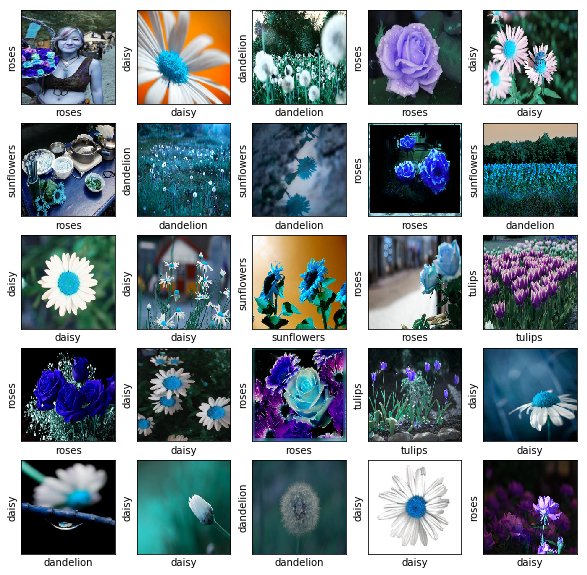

In [20]:
TestingData(predictions,indexToLabel)

In [19]:
 def TestingData(predictions,index_to_label):
        plt.figure(figsize=(10,10))
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(test_images[i], cmap=plt.cm.binary)
            plt.xlabel(index_to_label[np.argmax(predictions[i])])
            plt.ylabel(index_to_label[test_lebel[i]])
        plt.show()

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

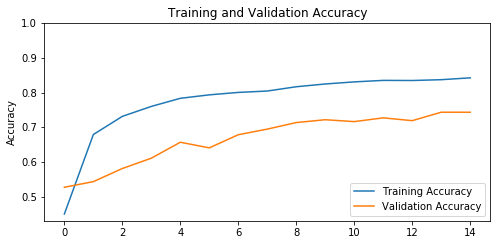

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

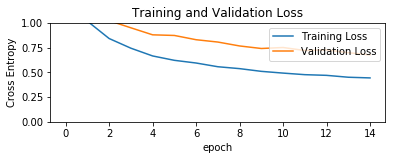

In [23]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [3]:
modele="model.h5"

In [26]:
model.save(modele)

In [9]:
model.load_weights(checkpoint_path)

In [10]:
loss,accuracy=model.evaluate(test_images, test_lebel)
print("Accuracy: {}, Loss: {}".format((accuracy*100),loss ))
predictions = model.predict(test_images)

NameError: name 'test_images' is not defined